# Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy # The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more
import requests as rq
from config2 import weather_api_key
from datetime import datetime
import time

# Generate the latitudes and longitudes

In [2]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
# lat_lngs

# Unpack the zip object

Add the latitudes and longitudes to a list.

In [3]:
coordinates = list(lat_lngs)
# coordinates

# Generate Random World Cities

Identify the nearest city for each latitude and longitude combination.

In [4]:
# Create a list for holding the cities.
cities = []

# Loop through the coordinates and identify thr nearest cities for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

# Loop through the list of cities and build the city URL.

In [5]:
# Build the basic URL for the OpenWeatherMap with the weather_api_key.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city1_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city1 in enumerate(cities): 
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city1_url = url + "&q=" + city1 #.replace("", "+")
    # print(city1_url)
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city1}" )
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city1_weather = rq.get(city1_url).json()
        # Parse out the needed data.
        city1_lat = city1_weather["coord"]["lat"]
        city1_lng = city1_weather["coord"]["lon"]
        city1_max_temp = city1_weather["main"]["temp_max"]
        city1_humidity = city1_weather["main"]["humidity"]
        city1_clouds = city1_weather["clouds"]["all"]
        city1_wind = city1_weather["wind"]["speed"]
        city1_country = city1_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city1_date = datetime.utcfromtimestamp(city1_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city1_data.append({"City": city1.title(),
                          "Lat": city1_lat,
                          "Lng": city1_lng,
                          "Max Temp": city1_max_temp,
                          "Humidity": city1_humidity,
                          "Cloudiness": city1_clouds,
                          "Wind Speed": city1_wind,
                          "Country": city1_country,
                          "Date": city1_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | furano
Processing Record 4 of Set 1 | sao miguel do araguaia
Processing Record 5 of Set 1 | amderma
City not found. Skipping...
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | priupskiy
Processing Record 8 of Set 1 | xixiang
Processing Record 9 of Set 1 | nome
Processing Record 10 of Set 1 | nordenham
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | buraydah
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | ukiah
Processing Record 20 of Set 1 | goderich
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | brookhaven
Processing Record 

Processing Record 34 of Set 4 | ilulissat
Processing Record 35 of Set 4 | boyolangu
Processing Record 36 of Set 4 | aykhal
Processing Record 37 of Set 4 | necochea
Processing Record 38 of Set 4 | mineiros
Processing Record 39 of Set 4 | harnosand
Processing Record 40 of Set 4 | hastings
Processing Record 41 of Set 4 | homer
Processing Record 42 of Set 4 | kahului
Processing Record 43 of Set 4 | rincon
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | polunochnoye
Processing Record 46 of Set 4 | rurrenabaque
Processing Record 47 of Set 4 | sedelnikovo
City not found. Skipping...
Processing Record 48 of Set 4 | marawi
Processing Record 49 of Set 4 | minas
Processing Record 50 of Set 4 | yellowknife
Processing Record 1 of Set 5 | kaeo
Processing Record 2 of Set 5 | khromtau
Processing Record 3 of Set 5 | severo-kurilsk
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | sao filipe
Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | dnep

Processing Record 24 of Set 8 | nueva loja
Processing Record 25 of Set 8 | longlac
City not found. Skipping...
Processing Record 26 of Set 8 | suihua
Processing Record 27 of Set 8 | baherden
Processing Record 28 of Set 8 | gat
Processing Record 29 of Set 8 | naze
Processing Record 30 of Set 8 | soledad
Processing Record 31 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 32 of Set 8 | xuddur
Processing Record 33 of Set 8 | roma
Processing Record 34 of Set 8 | sotnikovo
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | vesoul
Processing Record 37 of Set 8 | tremedal
Processing Record 38 of Set 8 | libusin
Processing Record 39 of Set 8 | orshanka
Processing Record 40 of Set 8 | iqaluit
Processing Record 41 of Set 8 | praia
Processing Record 42 of Set 8 | limuru
Processing Record 43 of Set 8 | cap-aux-meules
Processing Record 44 of Set 8 | saint-denis
Processing Record 45 of Set 8 | raga
Processing Record 46 of Set 8 | dasoguz
Processing Record 47 of

Processing Record 14 of Set 12 | glen allen
Processing Record 15 of Set 12 | san patricio
Processing Record 16 of Set 12 | buala
Processing Record 17 of Set 12 | cairns
Processing Record 18 of Set 12 | hebi
Processing Record 19 of Set 12 | temaraia
City not found. Skipping...
Processing Record 20 of Set 12 | eregli
Processing Record 21 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 22 of Set 12 | blackwater
Processing Record 23 of Set 12 | delano
Processing Record 24 of Set 12 | batagay
Processing Record 25 of Set 12 | singapore
Processing Record 26 of Set 12 | akcakoca
Processing Record 27 of Set 12 | aksarka
Processing Record 28 of Set 12 | waingapu
Processing Record 29 of Set 12 | raudeberg
Processing Record 30 of Set 12 | sorvag
City not found. Skipping...
Processing Record 31 of Set 12 | ambon
Processing Record 32 of Set 12 | nantucket
Processing Record 33 of Set 12 | westport
Processing Record 34 of Set 12 | oboyan
Processing Record 35 of Set 12 | guanhaes
Processing Rec

In [7]:
len(city1_data)

555

### Create a dataframe of city weather data and export as csv file.

In [8]:
# convert the array of dictionaries to a pandas dateframe
city_data_df = pd.DataFrame(city1_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,56.82,58,40,23.02,AR,2022-02-08 17:55:51
1,Mahebourg,-20.4081,57.7000,77.29,83,40,3.44,MU,2022-02-08 17:58:41
2,Furano,43.2818,142.4743,8.37,98,100,2.35,JP,2022-02-08 17:58:41
3,Sao Miguel Do Araguaia,-13.2750,-50.1628,82.85,72,91,3.85,BR,2022-02-08 17:58:42
4,Mataura,-46.1927,168.8643,48.47,99,35,3.18,NZ,2022-02-08 17:58:42
5,Priupskiy,53.9096,37.7360,29.14,80,100,9.69,RU,2022-02-08 17:58:43
6,Xixiang,35.1628,112.8650,35.71,61,98,2.35,CN,2022-02-08 17:58:43
7,Nome,64.5011,-165.4064,-10.39,95,100,8.95,US,2022-02-08 17:58:43
8,Nordenham,53.5000,8.4833,48.24,98,100,14.45,DE,2022-02-08 17:58:44
9,Bluff,-46.6000,168.3333,48.79,91,49,12.01,NZ,2022-02-08 17:58:44


In [9]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [10]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-02-08 17:55:51,-54.8000,-68.3000,56.82,58,40,23.02
1,Mahebourg,MU,2022-02-08 17:58:41,-20.4081,57.7000,77.29,83,40,3.44
2,Furano,JP,2022-02-08 17:58:41,43.2818,142.4743,8.37,98,100,2.35
3,Sao Miguel Do Araguaia,BR,2022-02-08 17:58:42,-13.2750,-50.1628,82.85,72,91,3.85
4,Mataura,NZ,2022-02-08 17:58:42,-46.1927,168.8643,48.47,99,35,3.18
5,Priupskiy,RU,2022-02-08 17:58:43,53.9096,37.7360,29.14,80,100,9.69
6,Xixiang,CN,2022-02-08 17:58:43,35.1628,112.8650,35.71,61,98,2.35
7,Nome,US,2022-02-08 17:58:43,64.5011,-165.4064,-10.39,95,100,8.95
8,Nordenham,DE,2022-02-08 17:58:44,53.5000,8.4833,48.24,98,100,14.45
9,Bluff,NZ,2022-02-08 17:58:44,-46.6000,168.3333,48.79,91,49,12.01


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get data for plotting.

retrieve the data for latitude, maximum temperature, humidity, cloudiness, and wind speed.

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats1 = city_data_df["Lat"]
lngs1 = city_data_df['Lng']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Plotting Properties

## Plot latitude vs. max temperature

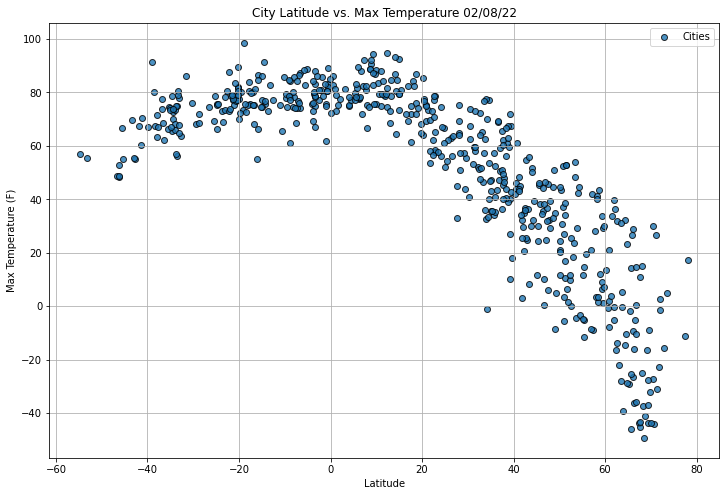

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.subplots(figsize=(12,8))
plt.scatter(lats1,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

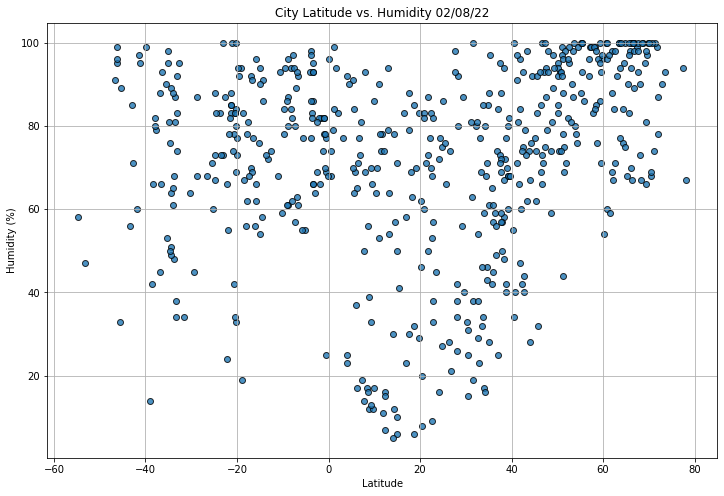

In [14]:
plt.subplots(figsize=(12,8))
plt.scatter(lats1,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

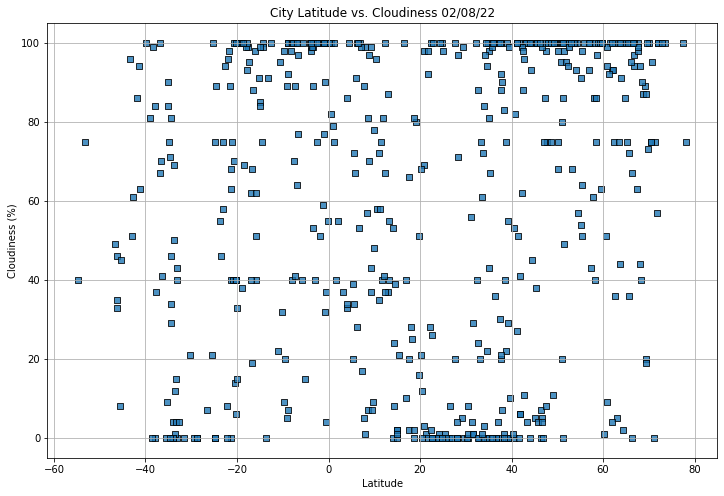

In [15]:
plt.subplots(figsize=(12,8))
plt.scatter(lats1, cloudiness,
           edgecolor="black", linewidths=1, marker="s",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

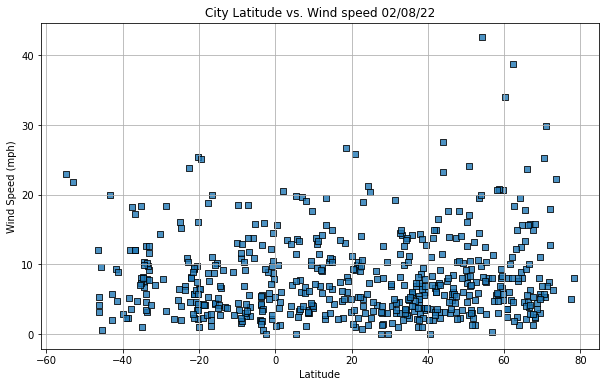

In [16]:
plt.subplots(figsize=(10,6))
plt.scatter(lats1, wind_speed, 
            edgecolor="black", linewidths=1, marker="s",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Plot longitude vs Max Temp

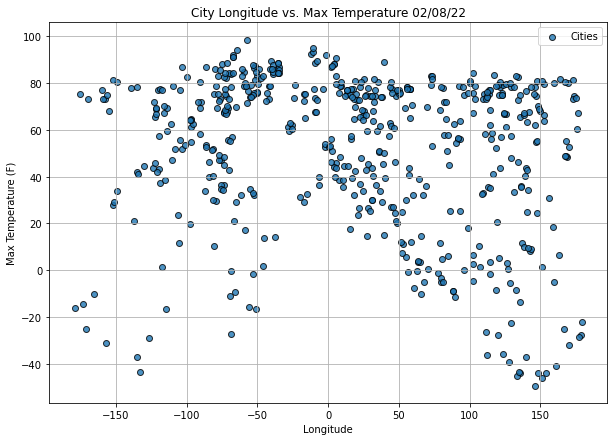

In [17]:
plt.subplots(figsize=(10,7))
plt.scatter(lngs1, max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Longitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Longitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig5.png")

# Show plot.
plt.show()

# Use Linear Regression to Find the Relationship Between Variables

In [18]:
# Import linear regression from the scipy stats module.
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Print the r_value
    print(f'The r_value is: {r_value:.3f}' )
    
    # Calculate the regreesion line 'y values' from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create the scatter plot and plot the regression line.
    plt.subplots(figsize = (9,6))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r') # the 'r' stands for red color
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    

##  Create the Northen Hemisphere DataFrames

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Lompoc
Country                        US
Date          2022-02-08 17:57:00
Lat                       34.6391
Lng                     -120.4579
Max Temp                    77.13
Humidity                       46
Cloudiness                     22
Wind Speed                   2.71
Name: 13, dtype: object

In [21]:
# filter latitude equal or greater than zero
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Furano,JP,2022-02-08 17:58:41,43.2818,142.4743,8.37,98,100,2.35
5,Priupskiy,RU,2022-02-08 17:58:43,53.9096,37.7360,29.14,80,100,9.69
6,Xixiang,CN,2022-02-08 17:58:43,35.1628,112.8650,35.71,61,98,2.35
7,Nome,US,2022-02-08 17:58:43,64.5011,-165.4064,-10.39,95,100,8.95
8,Nordenham,DE,2022-02-08 17:58:44,53.5000,8.4833,48.24,98,100,14.45


In [22]:
# # Alternatively, filter latitude equal or greater than zero
# northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# northern_hemi_df.head()

The r_value is: -0.875


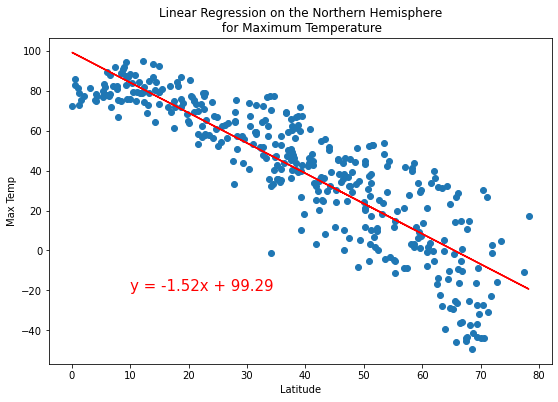

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = 'Linear Regression on the Northern Hemisphere\n for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Max Temp', (10,-20))

## Create the Southern Hemisphere DataFrames

In [24]:
# Alternatively, filter latitude  less than zero
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-02-08 17:55:51,-54.8000,-68.3000,56.82,58,40,23.02
1,Mahebourg,MU,2022-02-08 17:58:41,-20.4081,57.7000,77.29,83,40,3.44
3,Sao Miguel Do Araguaia,BR,2022-02-08 17:58:42,-13.2750,-50.1628,82.85,72,91,3.85
4,Mataura,NZ,2022-02-08 17:58:42,-46.1927,168.8643,48.47,99,35,3.18
9,Bluff,NZ,2022-02-08 17:58:44,-46.6000,168.3333,48.79,91,49,12.01


The r_value is: 0.583


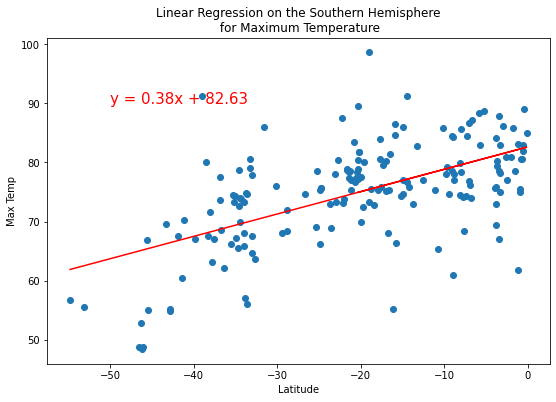

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = 'Linear Regression on the Southern Hemisphere\n for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Max Temp', (-50,90))

# Find the Correlation Between Latitude and Percent Humidity

## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

The r_value is: 0.506


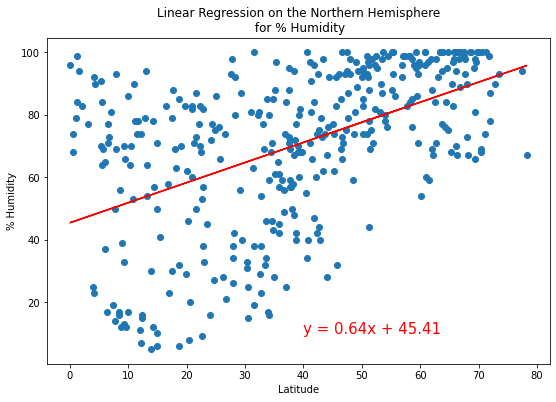

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

The r_value is: 0.127


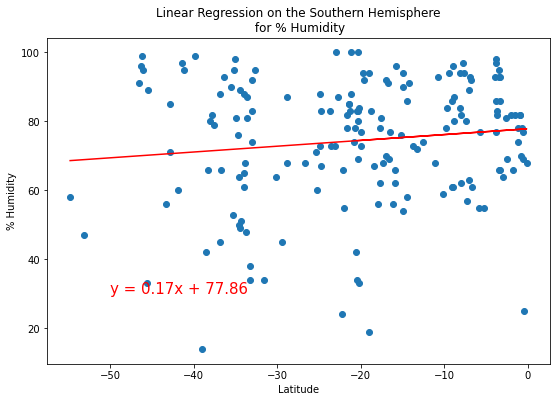

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,30))

# Find the Correlation Between Latitude and Percent Cloudiness

The r_value is: 0.309


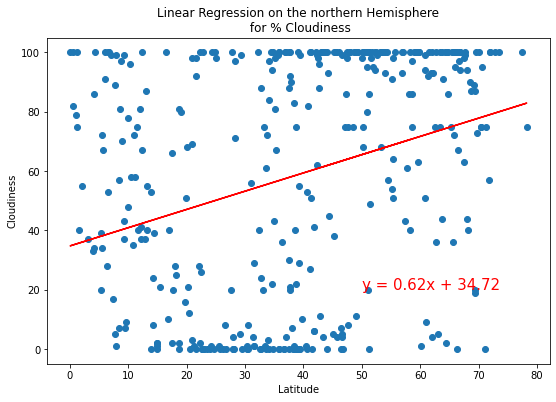

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere\n for % Cloudiness', 'Cloudiness',(50,20))

The r_value is: 0.345


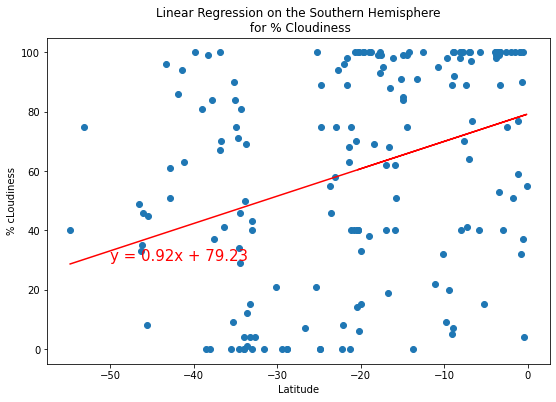

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% cLoudiness',(-50,30))

# Find the Correlation Between Latitude and Wind Speed

The r_value is: 0.089


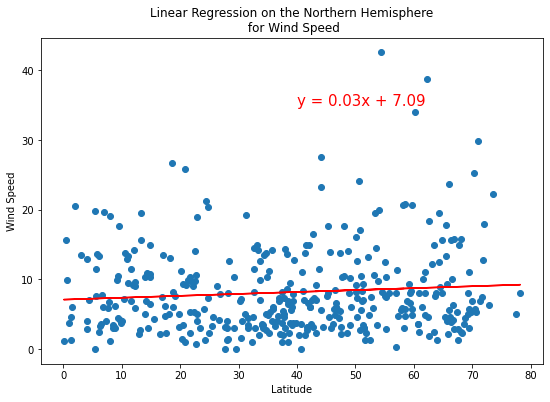

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(40,35))

The r_value is: -0.149


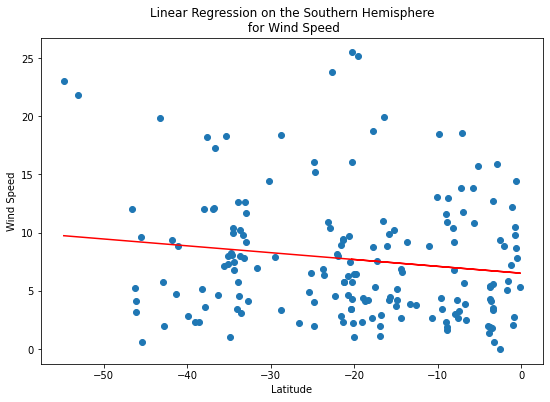

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))